https://github.com/rolling-scopes-school/ml-intro/tree/2021/4_feature_engineering_selection  
https://github.com/palinkapro/RS_School/tree/main/4  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline

In [307]:
wine = load_wine(as_frame=True)
X, y = wine['data'], wine['target']

In [96]:
def my_scaler(X):
    if isinstance(X, pd.DataFrame): X = X.values
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)    

class MyScaler:
    def fit_transform(self, X):
        if isinstance(X, pd.DataFrame): X = X.values
        return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [102]:
X1 = my_scaler(X)
X2 = MyScaler().fit_transform(X)
X0 = StandardScaler().fit_transform(X)
(X1 == X0).all(), (X2 == X0).all()

(True, True)

In [103]:
pd.DataFrame(X0, columns=X.columns)[:2]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


In [104]:
pd.DataFrame(X1, columns=X.columns)[:2]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


In [105]:
pd.DataFrame(X2, columns=X.columns)[:2]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


In [222]:
def check_my_scalers(X):
    X1 = my_scaler(X)
    X2 = StandardScaler().fit_transform(X)
    X0 = MyScaler().fit_transform(X)
    assert (X1 == X0).all(), 'my_scaler sucks :('
    assert (X2 == X0).all(),'MyScaler sucks :('

check_my_scalers(np.random.rand(10, 10) * 0.1)
check_my_scalers(np.random.rand(10, 10) * 100)

In [245]:
def plot_scatter(x, y, auto_scaled=True, equal_scaled=False, title=None, clusters=None):
    plt.figure(figsize=(4, 4))
    plt.scatter(x, y, c=clusters, cmap='bwr')
    if not auto_scaled: plt.axis('square')
    if equal_scaled: plt.axis('equal')
    plt.grid(True)
    plt.title(title)

In [246]:
feature_0 = np.random.randn(1000) * 10   
feature_1 = np.concatenate([np.random.randn(500), np.random.randn(500) + 5])
data = np.column_stack([feature_0, feature_1])
data_ss = StandardScaler().fit_transform(data)
data_mm = MinMaxScaler().fit_transform(data)

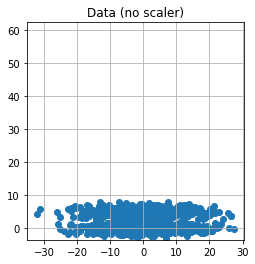

In [334]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=False, title='Data (no scaler)')

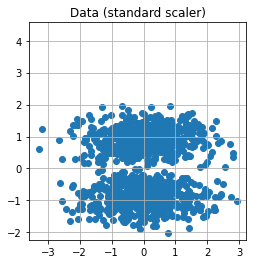

In [247]:
plot_scatter(data_ss[:, 0], data_ss[:, 1], auto_scaled=False, title='Data (standard scaler)')

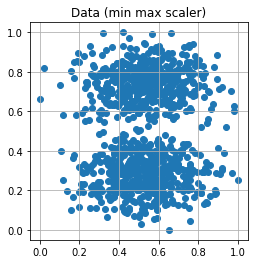

In [248]:
plot_scatter(data_mm[:, 0], data_mm[:, 1], auto_scaled=False, title='Data (min max scaler)')

In [270]:
clusters = KMeans(2).fit_predict(data)
clusters_ss = KMeans(2).fit_predict(data_ss)
clusters_mm = KMeans(2).fit_predict(data_mm)

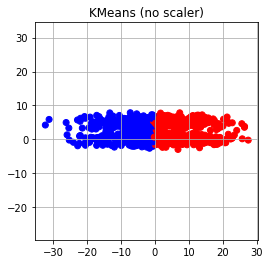

In [299]:
plot_scatter(data[:,0], data[:,1], equal_scaled=True, clusters=clusters, title='KMeans (no scaler)')

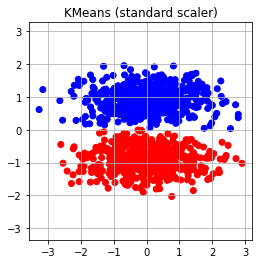

In [300]:
plot_scatter(data_ss[:,0], data_ss[:,1], equal_scaled=True, clusters=clusters_ss, title='KMeans (standard scaler)')

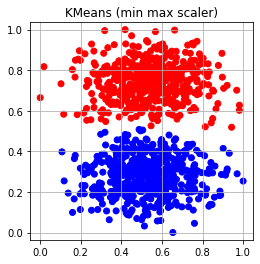

In [301]:
plot_scatter(data_mm[:,0], data_mm[:,1], equal_scaled=True, clusters=clusters_mm, title='KMeans (min max scaler)')

In [76]:
wine = load_wine(as_frame=True)
X, y = wine['data'], wine['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [116]:
main_model = LogisticRegression(solver='liblinear', penalty='l1')
selection_model = RandomForestClassifier(random_state=42)
pipe_scaling = make_pipeline(StandardScaler(), main_model)
pipe_selection = make_pipeline(StandardScaler(), SelectFromModel(selection_model), main_model)

In [117]:
score_base = cross_val_score(main_model, X_train, y_train, scoring='accuracy', cv=5).mean()
score_scaling = cross_val_score(pipe_scaling, X_train, y_train, scoring='accuracy', cv=5).mean()
score_selection = cross_val_score(pipe_selection, X_train, y_train, scoring='accuracy', cv=5).mean()
print(f'base: {score_base:.3f}, scaling: {score_scaling:.3f}, selection: {score_selection:.3f}')

base: 0.903, scaling: 0.976, selection: 0.960


In [118]:
main_model.fit(X_train, y_train)
score_base = main_model.score(X_val, y_val)
pipe_scaling.fit(X_train, y_train)
score_scaling = pipe_scaling.score(X_val, y_val)
pipe_selection.fit(X_train, y_train)
score_selection = pipe_selection.score(X_val, y_val)
print(f'base: {score_base:.3f}, scaling: {score_scaling:.3f}, selection: {score_selection:.3f}')

base: 0.981, scaling: 0.981, selection: 1.000


In [119]:
main_model.fit(X_train, y_train)
score_base = accuracy_score(y_val, main_model.predict(X_val))
pipe_scaling.fit(X_train, y_train)
score_scaling = accuracy_score(y_val, pipe_scaling.predict(X_val))
pipe_selection.fit(X_train, y_train)
score_selection = accuracy_score(y_val, pipe_selection.predict(X_val))
print(f'base: {score_base:.3f}, scaling: {score_scaling:.3f}, selection: {score_selection:.3f}')

base: 0.981, scaling: 0.981, selection: 1.000


In [120]:
score_base = cross_val_score(main_model, X, y, scoring='accuracy', cv=5).mean()
score_scaling = cross_val_score(pipe_scaling, X, y, scoring='accuracy', cv=5).mean()
score_selection = cross_val_score(pipe_selection, X, y, scoring='accuracy', cv=5).mean()
print(f'base: {score_base:.3f}, scaling: {score_scaling:.3f}, selection: {score_selection:.3f}')

base: 0.961, scaling: 0.983, selection: 0.983
